<a href="https://colab.research.google.com/github/gandhimonil9823/CS_GO_Analysis/blob/main/CS_GO_Analysis_renaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt_kwargs = {'figsize': (10, 4)}

In [3]:
from google.colab import drive
drive.mount('/content/drive')
#drive.mount(r'drive/folders/0AAxMXLC9WPNxUk9PVA')


Mounted at /content/drive


In [4]:
ls

drive/  sample_data/


In [5]:
cd 'drive/Shared drives/CS_GO_Data/processed_data'

/content/drive/Shared drives/CS_GO_Data/processed_data


In [6]:
ls

filtered_master_dmg_demos.csv       filtered_master_kills_demos.csv
filtered_master_grenades_demos.csv  filtered_meta_demos.csv


In [7]:
# Function to combine the dataframes and return a single dataframe
def combine_dataframes(df1,df2):
  df_to_return = df1.append(df2)
  df_to_return = df_to_return.reset_index(drop=True)
  return df_to_return

# Code for Preprocessing the esea_meta_demos dataset

In [7]:
def load_esea_meta_demos():
  df_esea_meta_demos = pd.read_csv("filtered_meta_demos.csv", index_col=[0])
  df_esea_meta_demos = df_esea_meta_demos.reset_index(drop=True)
  return df_esea_meta_demos

# Function to preprocess the combined esea_meta_demos dataset
def preprocess_esea_meta_demos():
  
  # load the esea_meta_demos_filtered file
  df_esea_meta_demos = load_esea_meta_demos()

  return df_esea_meta_demos

In [8]:
# function call to load and preprocess the esea_meta_demos
df_esea_meta_demos = preprocess_esea_meta_demos()

df_esea_meta_demos.head()

,file,map,round,start_seconds,end_seconds,winner_team,winner_side,round_type,ct_eq_val,t_eq_val
0,esea_match_13770997.dem,de_overpass,1,94.30782,160.9591,Hentai Hooligans,Terrorist,PISTOL_ROUND,4300,4250
1,esea_match_13770997.dem,de_overpass,2,160.95910,279.3998,Hentai Hooligans,Terrorist,ECO,6300,19400
2,esea_match_13770997.dem,de_overpass,3,279.39980,341.0084,Hentai Hooligans,Terrorist,SEMI_ECO,7650,19250
3,esea_match_13770997.dem,de_overpass,4,341.00840,435.4259,Hentai Hooligans,Terrorist,NORMAL,24900,23400
4,esea_match_13770997.dem,de_overpass,5,435.42590,484.2398,Animal Style,CounterTerrorist,ECO,5400,20550


# Code for Preprocessing the esea_master_dmg_demos dataset

In [ ]:
def load_esea_master_dmg_demos():
  df_esea_master_dmg_demos = pd.read_csv("filtered_master_dmg_demos.csv")
  df_esea_master_dmg_demos.drop('Unnamed: 0', axis=1, inplace=True)
  df_esea_master_dmg_demos = df_esea_master_dmg_demos.reset_index(drop=True)
  return df_esea_master_dmg_demos

def delete_world_damage(df_esea_master_dmg_demos):
  df_esea_master_dmg_demos_cleanedup = df_esea_master_dmg_demos[df_esea_master_dmg_demos.att_side != 'None']
  df_esea_master_dmg_demos_cleanedup = df_esea_master_dmg_demos_cleanedup[df_esea_master_dmg_demos_cleanedup.att_side != df_esea_master_dmg_demos_cleanedup.vic_side]
  df_esea_master_dmg_demos_cleanedup = df_esea_master_dmg_demos_cleanedup.reset_index(drop=True)
  return df_esea_master_dmg_demos_cleanedup

# Function to preprocess the combined esea_meta_demos dataset
def preprocess_esea_master_dmg_demos():

  # load the esea_meta_demos_filtered file
  df_esea_master_dmg_demos = load_esea_master_dmg_demos()

  #delete world damage (non player damage sustained)
  df_esea_master_dmg_demos = delete_world_damage(df_esea_master_dmg_demos)

  return df_esea_master_dmg_demos

In [ ]:
df_esea_master_dmg_demos = preprocess_esea_master_dmg_demos()

df_esea_master_dmg_demos.head()

,file,round,tick,seconds,att_team,vic_team,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted,bomb_site,hitbox,wp,wp_type,att_id,att_rank,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y
0,esea_match_13770997.dem,1,15972,124.3761,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,18,9,False,NaN,Stomach,USP,Pistol,76561198048742997,0,76561198082200410,0,-1499.6900,63.33829,-669.5558,-79.769570
1,esea_match_13770997.dem,1,16058,125.0495,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,100,0,False,NaN,Head,USP,Pistol,76561198055054795,0,76561197961009213,0,-1066.8740,3.44563,-614.1868,-91.707770
2,esea_match_13770997.dem,1,16066,125.1121,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,12,7,False,NaN,RightArm,Glock,Pistol,76561198082200410,0,76561198055054795,0,-747.3146,-49.32681,-1065.5560,9.381622
3,esea_match_13770997.dem,1,16108,125.4410,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,15,7,False,NaN,Chest,USP,Pistol,76561198048742997,0,76561198082200410,0,-1501.8610,49.19798,-748.4188,-53.469220
4,esea_match_13770997.dem,1,16188,126.0674,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,94,0,False,NaN,Head,Glock,Pistol,76561198082200410,0,76561198048742997,0,-756.2186,-80.94859,-1500.0780,60.658150


In [ ]:
grouped = df_esea_master_dmg_demos.groupby('file').first()
grouped
#the first rounds of all matches

,round,tick,seconds,att_team,vic_team,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted,bomb_site,hitbox,wp,wp_type,att_id,att_rank,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y
file,,,,,,,,,,,,,,,,,,,,,,
esea_match_13770997.dem,1,15972,124.3761,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,18,9,False,B,Stomach,USP,Pistol,76561198048742997,0,76561198082200410,0,-1499.69000,63.33829,-669.55580,-79.76957
esea_match_13779704.dem,1,20759,161.8639,Team 1,Team 2,CounterTerrorist,Terrorist,15,7,False,B,Chest,USP,Pistol,76561198078736000,0,76561198371993258,0,-170.91130,2002.93500,511.55050,1678.62100
esea_match_13779770.dem,1,22108,172.7360,Team 2,Team 1,Terrorist,CounterTerrorist,89,0,False,A,Head,Glock,Pistol,76561197988840549,0,76561197961301740,0,-1183.93800,777.64410,-2115.65300,775.35620
esea_match_13779775.dem,1,20528,159.9996,Team 2,Team 1,Terrorist,CounterTerrorist,46,15,False,A,Generic,HE,Grenade,76561198285314675,0,76561198075161204,0,257.46990,1719.66500,929.84270,1948.40800
esea_match_13779780.dem,1,20156,157.2749,Team 1,Team 2,CounterTerrorist,Terrorist,20,6,False,A,Generic,HE,Grenade,76561197961276586,0,76561198272541571,0,875.96880,2417.23200,82.23686,973.50820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
esea_match_13829155.dem,1,20872,162.9502,Team 2,Team 1,Terrorist,CounterTerrorist,100,0,False,A,Head,Glock,Pistol,76561198821543565,0,76561198434695593,0,87.94901,1821.54200,78.41760,2244.16400
esea_match_13829165.dem,1,19701,153.8882,Team 2,Team 1,Terrorist,CounterTerrorist,7,4,False,A,Stomach,Glock,Pistol,76561198007445998,0,76561198004158144,0,-465.49230,-671.70810,-431.63100,1897.77500
esea_match_13829169.dem,1,20843,162.7616,Team 2,Team 1,Terrorist,CounterTerrorist,8,4,False,B,Chest,Glock,Pistol,76561198045404066,0,76561198155685591,0,57.18853,-1427.15700,-948.27840,-2525.95100


In [ ]:
rename_dict = grouped[['att_team', 'vic_team','att_side','vic_side']].copy()
rename_dict = rename_dict[((rename_dict.att_team != 'Team 1') & (rename_dict.att_team != 'Team 2')) | ((rename_dict.vic_team != 'Team 1') & (rename_dict.vic_team != 'Team 2'))]
#only consider games where the team names aren't standard. Check both columns just in case
rename_dict.reset_index(inplace=True)

In [ ]:
rename_dict['Team 1'] = None
rename_dict['Team 2'] = None

In [ ]:
for index,row in rename_dict.iterrows():
  if row['att_side'] == 'CounterTerrorist':
    row['Team 1'] = row['att_team']
    row['Team 2'] = row['vic_team']
  else:
    row['Team 1'] = row['vic_team']
    row['Team 2'] = row['att_team']
  
rename_dict

,file,att_team,vic_team,att_side,vic_side,Team 1,Team 2
0,esea_match_13770997.dem,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,Animal Style,Hentai Hooligans
1,esea_match_13782025.dem,fish123,Endpoint,CounterTerrorist,Terrorist,fish123,Endpoint
2,esea_match_13782192.dem,Izako Boars,PACT,CounterTerrorist,Terrorist,Izako Boars,PACT
3,esea_match_13782504.dem,fish123,Endpoint,CounterTerrorist,Terrorist,fish123,Endpoint
4,esea_match_13782538.dem,Izako Boars,PACT,Terrorist,CounterTerrorist,PACT,Izako Boars
5,esea_match_13783103.dem,ONCA Gaming,Team Kinguin,CounterTerrorist,Terrorist,ONCA Gaming,Team Kinguin
6,esea_match_13787024.dem,Team Kinguin,PRiDE,CounterTerrorist,Terrorist,Team Kinguin,PRiDE
7,esea_match_13787180.dem,EURONICS Gaming,--to be determined--,CounterTerrorist,Terrorist,EURONICS Gaming,--to be determined--
8,esea_match_13787183.dem,ALTERNATE aTTaX,Sprout,CounterTerrorist,Terrorist,ALTERNATE aTTaX,Sprout
9,esea_match_13787381.dem,PRiDE,Team Kinguin,CounterTerrorist,Terrorist,PRiDE,Team Kinguin


In [ ]:
rename_dict.drop(columns=['att_team','vic_team','att_side','vic_side'], inplace=True)
rename_dict

,file,Team 1,Team 2
0,esea_match_13770997.dem,Animal Style,Hentai Hooligans
1,esea_match_13782025.dem,fish123,Endpoint
2,esea_match_13782192.dem,Izako Boars,PACT
3,esea_match_13782504.dem,fish123,Endpoint
4,esea_match_13782538.dem,PACT,Izako Boars
5,esea_match_13783103.dem,ONCA Gaming,Team Kinguin
6,esea_match_13787024.dem,Team Kinguin,PRiDE
7,esea_match_13787180.dem,EURONICS Gaming,--to be determined--
8,esea_match_13787183.dem,ALTERNATE aTTaX,Sprout
9,esea_match_13787381.dem,PRiDE,Team Kinguin


In [ ]:
# df_esea_master_dmg_demos_renamed = pd.DataFrame(df_esea_master_dmg_demos)

# #for index,to_rename_row in to_rename.iterrows():
# df_esea_master_dmg_demos_renamed[df_esea_master_dmg_demos_renamed.file == 'esea_match_13770997.dem'].att_team #to_rename_row.['file']]

0          Animal Style
1          Animal Style
2      Hentai Hooligans
3          Animal Style
4      Hentai Hooligans
             ...       
735        Animal Style
736        Animal Style
737        Animal Style
738    Hentai Hooligans
739    Hentai Hooligans
Name: att_team, Length: 740, dtype: object

In [ ]:
df_esea_master_dmg_demos_renamed = pd.DataFrame(df_esea_master_dmg_demos)

for index,dict_row in rename_dict.iterrows():
  for index,data_row in df_esea_master_dmg_demos_renamed.iterrows():
    if data_row['file'] == dict_row['file']:
      if data_row['att_team'] == dict_row['Team 1']:
        data_row['att_team'] = 'Team 1'
        data_row['vic_team'] = 'Team 2'
      else:
        data_row['att_team'] = 'Team 2'
        data_row['vic_team'] = 'Team 1'




# Data Preprocess for Data Mining Algorithms

In [9]:
# function call to load and preprocess the esea_meta_demos
df_esea_meta_demos = preprocess_esea_meta_demos()

df_esea_meta_demos.head()

print(len(df_esea_meta_demos))

340333


In [10]:
def terrorist_counterT_win(series_shifted_winner_side):
  terrorist_win = series_shifted_winner_side.apply(lambda x: 1 if x=='Terrorist' else 0)
  terrorist_win = terrorist_win.iloc[:-1]
  terrorist_win = terrorist_win.reset_index(drop=True)

  counterterrorist_win = series_shifted_winner_side.apply(lambda x: 1 if x=='CounterTerrorist' else 0)
  counterterrorist_win = counterterrorist_win.iloc[:-1]
  counterterrorist_win = counterterrorist_win.reset_index(drop=True)

  return terrorist_win, counterterrorist_win

def preprocess_meta_demos_algo(df_esea_meta_demos):

  df_original_preprocessed = df_esea_meta_demos[['round','ct_eq_val','t_eq_val']]

  unique_maps = df_esea_meta_demos["map"].unique()

  map_dataframe = pd.DataFrame()

  for map_cs_go in unique_maps:
    map_dataframe[map_cs_go] = df_esea_meta_demos["map"].apply(lambda x: 1 if x == map_cs_go else 0)

  series_one_element = pd.Series([0])

  binary_values_first_round = df_esea_meta_demos["round"].apply(lambda x : 0 if x == 1 else 1)

  binary_values_first_round = binary_values_first_round.rename("not_First_Round").reset_index(drop=True)

  series_shifted_winner_side = series_one_element.append(df_esea_meta_demos["winner_side"])

  terrorist_win, counterterrorist_win = terrorist_counterT_win(series_shifted_winner_side)

  terrorist_win = (terrorist_win * binary_values_first_round).rename('terrorist_win')

  counterterrorist_win = (counterterrorist_win * binary_values_first_round).rename('counterterrorist_win')

  previous_win_df = pd.concat([terrorist_win, counterterrorist_win])

  data_to_predict_T_CT = df_esea_meta_demos['winner_side'].apply(lambda x: 1 if x=='Terrorist' else 0)

  column_names = [df_original_preprocessed, map_dataframe, terrorist_win, counterterrorist_win, data_to_predict_T_CT]

  return pd.concat(column_names, axis = 'columns', join = 'inner')

In [11]:
df_preprocessed = preprocess_meta_demos_algo(df_esea_meta_demos)

df_preprocessed

,round,ct_eq_val,t_eq_val,de_overpass,de_cache,de_mirage,de_inferno,de_train,de_dust2,de_cbble,de_nuke,terrorist_win,counterterrorist_win,winner_side
0,1,4300,4250,1,0,0,0,0,0,0,0,0,0,1
1,2,6300,19400,1,0,0,0,0,0,0,0,1,0,1
2,3,7650,19250,1,0,0,0,0,0,0,0,1,0,1
3,4,24900,23400,1,0,0,0,0,0,0,0,1,0,1
4,5,5400,20550,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340328,18,4500,21950,0,0,1,0,0,0,0,0,1,0,1
340329,19,16400,26100,0,0,1,0,0,0,0,0,1,0,1
340330,20,15100,26000,0,0,1,0,0,0,0,0,1,0,1
340331,21,17550,25500,0,0,1,0,0,0,0,0,1,0,1


# Kills Analysis Based on GunPlay Economics


In [52]:
df_master_kills_demos = pd.read_csv("filtered_meta_demos.csv")

df_master_kills_demos

,Unnamed: 0,file,map,round,start_seconds,end_seconds,winner_team,winner_side,round_type,ct_eq_val,t_eq_val
0,0,esea_match_13770997.dem,de_overpass,1,94.30782,160.9591,Hentai Hooligans,Terrorist,PISTOL_ROUND,4300,4250
1,1,esea_match_13770997.dem,de_overpass,2,160.95910,279.3998,Hentai Hooligans,Terrorist,ECO,6300,19400
2,2,esea_match_13770997.dem,de_overpass,3,279.39980,341.0084,Hentai Hooligans,Terrorist,SEMI_ECO,7650,19250
3,3,esea_match_13770997.dem,de_overpass,4,341.00840,435.4259,Hentai Hooligans,Terrorist,NORMAL,24900,23400
4,4,esea_match_13770997.dem,de_overpass,5,435.42590,484.2398,Animal Style,CounterTerrorist,ECO,5400,20550
...,...,...,...,...,...,...,...,...,...,...,...
340328,161705,esea_match_13829173.dem,de_mirage,18,1647.20600,1694.6550,Team 1,Terrorist,ECO,4500,21950
340329,161706,esea_match_13829173.dem,de_mirage,19,1694.65500,1753.4380,Team 1,Terrorist,NORMAL,16400,26100
340330,161707,esea_match_13829173.dem,de_mirage,20,1753.43800,1803.6580,Team 1,Terrorist,FORCE_BUY,15100,26000
340331,161708,esea_match_13829173.dem,de_mirage,21,1803.65800,1856.0850,Team 1,Terrorist,NORMAL,17550,25500


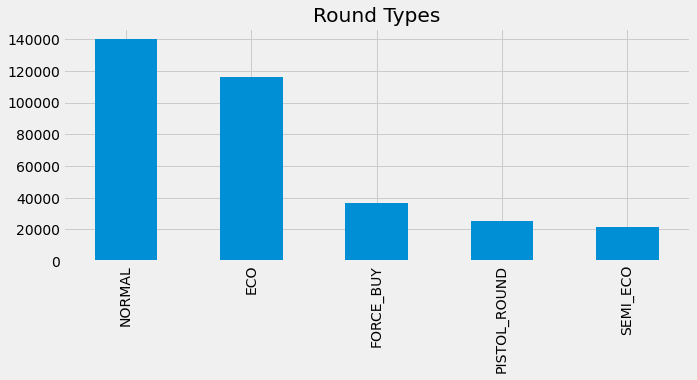

In [53]:
df_master_kills_demos['round_type'].value_counts().plot.bar(title='Round Types', **plt_kwargs)

Text(0.5, 0.98, 'Team Round Spend Values')

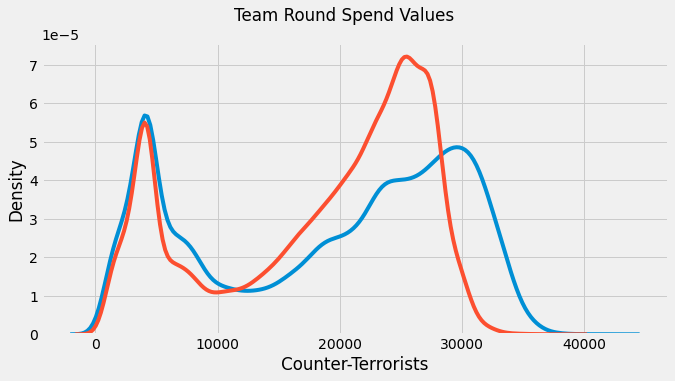

In [54]:
 # Round Spend Value

fig = plt.figure(figsize=(10, 5))
sns.kdeplot(df_master_kills_demos['ct_eq_val'].rename('Counter-Terrorists'))
sns.kdeplot(df_master_kills_demos['t_eq_val'].rename('Terrorists'))
plt.suptitle("Team Round Spend Values")

In [44]:
# df = pd.DataFrame().assign(winner=df_master_kills_demos['winner_side'], point_diff=df_master_kills_demos['ct_eq_val'] - df_master_kills_demos['t_eq_val'])

# print(df)

# df = df.assign(point_diff=df.apply(lambda srs: srs.point_diff if srs.winner[0] == 'C' else -srs.point_diff, axis='columns'), winner=df.winner.map(lambda v: True if v[0] == 'C' else False))

# print(df)

df_master_kills_demos = df_master_kills_demos[0:10000]

print(df_master_kills_demos)

df_new_data = pd.DataFrame()
for i, row in df_master_kills_demos.iterrows():
  if row["winner_side"] == "CounterTerrorist":
    df_new_data.at[i, "winner"] = True
    df_new_data.at[i, "point_difference"] = row['ct_eq_val'] - row['t_eq_val']
  else:
    df_new_data.at[i, "winner"] = False
    df_new_data.at[i, "point_difference"] = -(row['ct_eq_val'] - row['t_eq_val'])

df_new_data






      Unnamed: 0                     file  ... ct_eq_val  t_eq_val
0              0  esea_match_13770997.dem  ...      4300      4250
1              1  esea_match_13770997.dem  ...      6300     19400
2              2  esea_match_13770997.dem  ...      7650     19250
3              3  esea_match_13770997.dem  ...     24900     23400
4              4  esea_match_13770997.dem  ...      5400     20550
...          ...                      ...  ...       ...       ...
9995       10899  esea_match_13780476.dem  ...     31800      6400
9996       10900  esea_match_13780476.dem  ...     32400     25450
9997       10901  esea_match_13780476.dem  ...     28650     28750
9998       10902  esea_match_13780476.dem  ...     29000     19500
9999       10903  esea_match_13780477.dem  ...      4450      4200

[10000 rows x 11 columns]


,winner,point_difference
0,False,-50.0
1,False,13100.0
2,False,11600.0
3,False,-1500.0
4,True,-15150.0
...,...,...
9995,True,25400.0
9996,False,-6950.0
9997,True,-100.0
9998,False,-9500.0


Text(0, 0.5, '% Games Won')

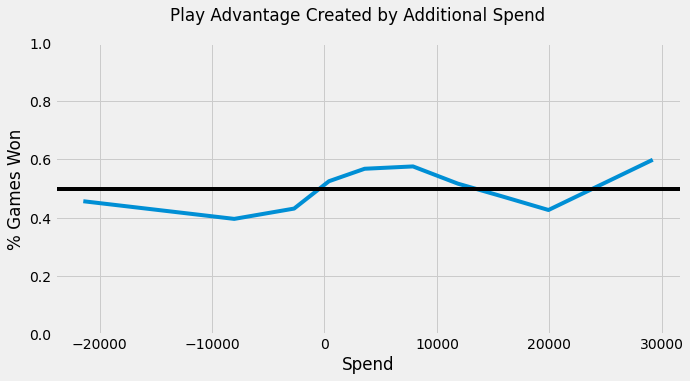

In [45]:
df_new_data = df_new_data.assign(point_diff_cat=pd.qcut(df_new_data.point_difference, 10)).groupby("point_diff_cat").apply(lambda df_new_data: df_new_data.winner.sum() / len(df_new_data.winner))

df_new_data.index = df_new_data.index.values.map(lambda val: val.left + (val.right - val.left) / 2).astype(int)

df_new_data
# for i, group in df_new_data:
#   group.apply(lambda group: group["winner"].sum() / len(group["winner"]))
#   print(group)


fig = plt.figure(figsize=(10, 5))
df_new_data.plot.line()
plt.suptitle("Play Advantage Created by Additional Spend")
ax = plt.gca()
ax.axhline(0.5, color='black')
ax.set_ylim([0, 1])
ax.set_xlabel('Spend')
ax.set_ylabel('% Games Won')

Text(0.5, 0.98, 'Team Weapon Values')

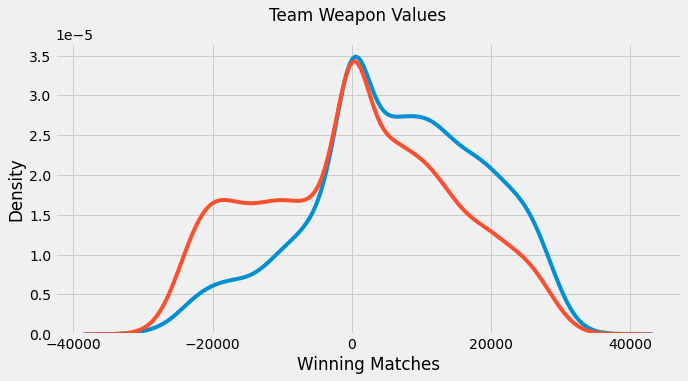

In [46]:
fig = plt.figure(figsize=(10, 5))

sns.kdeplot(df_master_kills_demos.query('winner_side == "CounterTerrorist"').pipe(lambda df_new_data: df_new_data.ct_eq_val - df_new_data.t_eq_val).rename('Winning Matches'))
sns.kdeplot(df_master_kills_demos.pipe(lambda df_new_data: df_new_data.ct_eq_val - df_new_data.t_eq_val).rename('All Matches'))

plt.suptitle("Team Weapon Values")

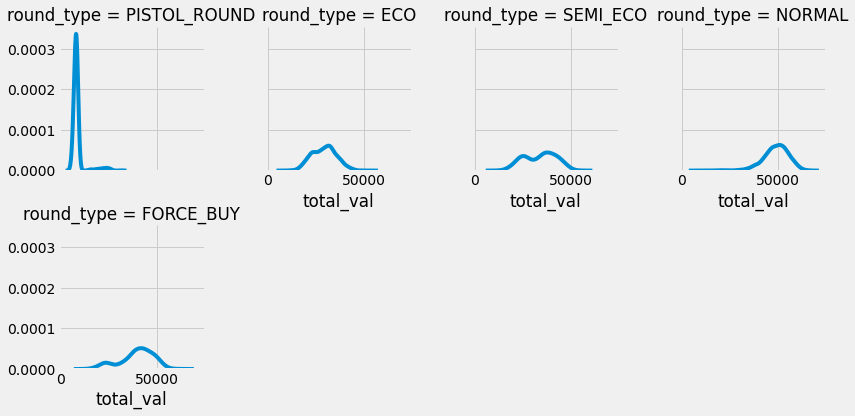

In [48]:
g = sns.FacetGrid(df_master_kills_demos.assign(
    total_val=df_master_kills_demos['ct_eq_val'] + df_master_kills_demos['t_eq_val']
), col="round_type", col_wrap=4)
g.map(sns.kdeplot, 'total_val')

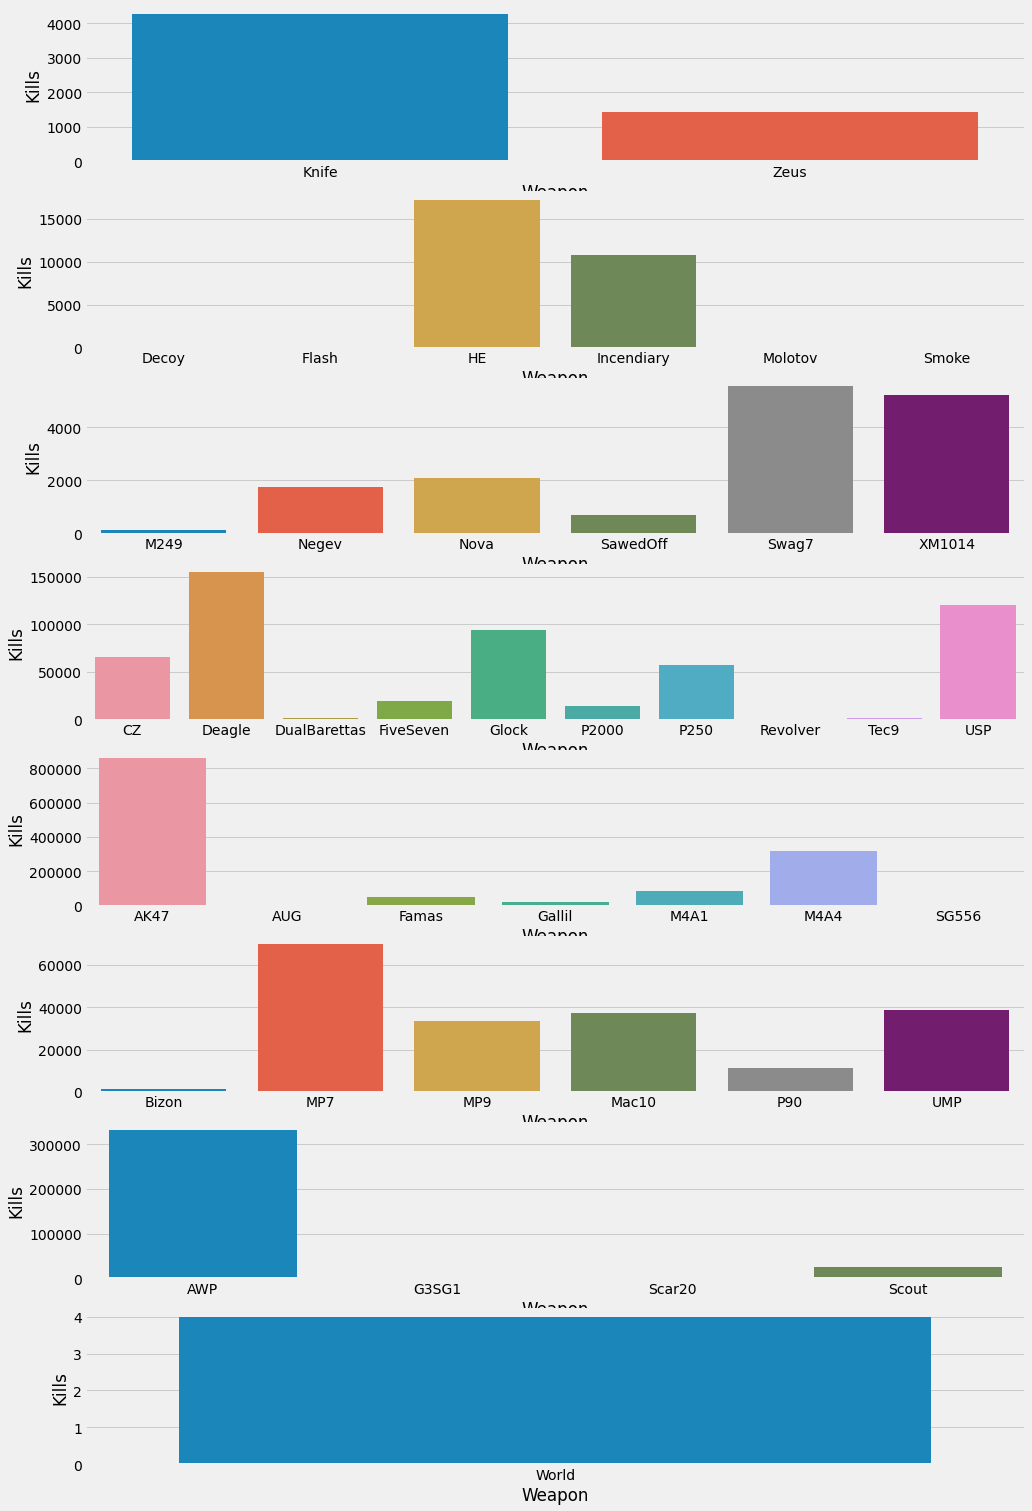

In [65]:
df_kills = pd.read_csv("filtered_master_kills_demos.csv")

# extract the data related to the weapons used on each kill
weaponData = df_kills.groupby(['wp_type','wp']).count().reset_index()[['wp_type','wp','file']]

weaponData = weaponData.rename(columns = {'wp_type':'Weapon_Type', 'wp':'Weapon', 'file':'Kills'})


# create a subplot for each weapon type
fig, axs = plt.subplots(ncols=1, nrows=8, figsize = (15,25)) # create 8 subplots
for ax_num in range(len(axs)): # loop through the subplots and plot the relavent data
    weaponType = weaponData['Weapon_Type'].unique()[ax_num]
    dataToPlot = weaponData[weaponData['Weapon_Type']==weaponType]
    sns.barplot(x='Weapon', y='Kills', data=dataToPlot, ax = axs[ax_num])